In [43]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt
import time

from sklearn import linear_model
from sklearn.metrics import r2_score

from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank
from array import array
from scipy.optimize import curve_fit

In [2]:
#Establecer directorio de datos

DIR='/Users/alex/Desktop'
FILE='/MatrizAdjSano/MatrizAdjTumor/adjmatrix_UNT.txt'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))



File directory:/Users/alex/Desktop/MatrizAdjSano/MatrizAdjTumor/adjmatrix_UNT.txt


In [3]:
data=pd.read_table(file)
a=np.diag(np.ones(16748),0)
A=data-a

In [4]:
threshold = A.mean().mean()

In [5]:
#https://stackoverflow.com/questions/13914920/networkx-extract-the-connected-component-containing-a-given-node-directed-grap?fbclid=IwAR0CLa62zO8y43PVzLDO54AZEo8Gozv4ai8hJDFKXXcgc8mZlN95wu3Xlio

#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat

In [6]:
#Función para calcular el polinomio característico de la matriz laplaciana sin signo

def pol_char_from_signless_lap(mat,n):
    
    
    simm_mat=mat_shape(mat,n)
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx)
    
    L_arr=L_from_Adj.toarray()
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    L_WO_Sign=deg_Mat+simm_mat
    
    pol_char=np.poly(L_WO_Sign)
    
    
    
    return pol_char

## Análisis de la matriz laplciana sin signo para datos UNT

## 1000 genes

In [7]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,1000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -4.20726000e+05  8.84157585e+10 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  10.215920493000112 segundos


## 2000 genes

In [8]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,2000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -1.68524400e+06  1.41930719e+12 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  20.909962541999903 segundos


## 3000 genes

In [9]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,3000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -3.78467800e+06  7.15948692e+12 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  48.36551501500003 segundos


## 4000 genes

In [10]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,4000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -6.73429600e+06  2.26696578e+13 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  103.25166430600007 segundos


## 5000 genes

In [11]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,5000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -1.05179340e+07  5.53023176e+13 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  225.94665110899996 segundos


## 6000 genes

In [12]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,6000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -1.51153600e+07  1.14217866e+14 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  491.0024890710001 segundos


## 7000 genes

In [13]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,7000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -2.05691240e+07  2.11513979e+14 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  1019.7051259719997 segundos


## 8000 genes

In [18]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,8000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -2.68269740e+07  3.59797947e+14 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  4320.3833227840005 segundos


In [7]:
#Esta es la función correcta
# a -> valor inicial de la iteración(corresponde al número de filas y columnas inciciales 
# tomadas de la matriz laplaciana sin signo)

# b -> cota superior de los valores de filas/columnas tomadas

# c -> aumentos que tendrá n en cada iteración 

# d -> incremento que tendrá la secuencia de números den range

# e -> aumento que debe tener el valor n cada que se inicia un nuevo ciclo for 

def cal_sev_coeff(a,b,c,d,e): 
    
    arr=[]
    n=a
    
    while n < b:
        
        m=n
        for m in range(m,m+c,d):
            
            pol = pol_char_from_signless_lap(A,m)
            pol_list = pol.tolist()
            
            arr.append(pol_list)
            
        n=n+e
            
    return arr 

In [8]:
# Función para calcular la conectividad algebraica a partir del out put 
# de la función anterior. Simplemente se multiplica por (- 1/2) cada
# componente de la lista que arroja la función anterior.

def get_alg_conn(lista_param):
    
    lista = []
    for num in lista_param:
        
        lista.append(- num/2)
        
    return lista  

# Conectividad algebraica

### Desde el gen 1 hasta el 1000 (de 100 en 100)

In [9]:
list_1000 = cal_sev_coeff(100,1100,100,100,100)

In [10]:
coeff_1000=[arr[1] for arr in list_1000]
coeff_1000

[-4250.000000000002,
 -16936.000000000015,
 -38248.00000000005,
 -67605.99999999997,
 -105334.00000000009,
 -151412.00000000003,
 -205934.0000000004,
 -268888.0000000004,
 -341300.0000000006,
 -420726.00000000076]

In [12]:
alg_conn1 = get_alg_conn(coeff_1000)

### Desde el gen 1000 hasta el 2000 (de 100 en 100)

In [13]:
list_2000 = cal_sev_coeff(1100,2100,100,100,100)

In [14]:
coeff_2000=[arr[1] for arr in list_2000]
coeff_2000

[-509964.00000000047,
 -606250.0000000012,
 -711852.000000002,
 -826468.0000000019,
 -950386.0000000021,
 -1081020.0000000014,
 -1220640.0000000044,
 -1368025.9999999993,
 -1522840.000000002,
 -1685244.0000000035]

In [17]:
alg_conn2 = get_alg_conn(coeff_2000)

### Desde el gen 2000 hasta el 3000 (de 100 en 100)

In [19]:
inicio = time.perf_counter()

list__3000 = cal_sev_coeff(2100,3100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  314.83745394600555 segundos


In [20]:
coeff_3000=[arr[1] for arr in list__3000]
coeff_3000

[-1864210.0000000047,
 -2045484.0000000019,
 -2234754.0000000033,
 -2431804.000000004,
 -2636508.0000000093,
 -2853995.9999999967,
 -3071706.0000000084,
 -3302502.0000000033,
 -3541426.0000000084,
 -3784677.9999999986]

In [21]:
alg_conn3 = get_alg_conn(coeff_3000)

### Desde el gen 3000 hasta el 4000 (de 100 en 100)

In [22]:
inicio = time.perf_counter()

list_4000 = cal_sev_coeff(3100,4100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  669.1075665300013 segundos


In [23]:
coeff_4000=[arr[1] for arr in list_4000]
coeff_4000

[-4040394.0000000065,
 -4302646.000000012,
 -4572374.000000016,
 -4857794.000000005,
 -5144832.000000019,
 -5440166.000000002,
 -5745810.000000015,
 -6069408.000000005,
 -6395854.000000022,
 -6734296.000000016]

In [24]:
alg_conn4 = get_alg_conn(coeff_4000)

### Desde el gen 4000 hasta el 5000 (de 100 en 100)

In [25]:
inicio = time.perf_counter()

list_5000 = cal_sev_coeff(4100,5100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  1196.0534327529967 segundos


In [26]:
coeff_5000=[arr[1] for arr in list_5000]
coeff_5000

[-7082610.000000029,
 -7430435.999999999,
 -7794514.000000004,
 -8156952.00000001,
 -8536480.00000001,
 -8916286.000000028,
 -9300422.000000032,
 -9700098.00000001,
 -10101672.00000005,
 -10517934.000000056]

In [27]:
alg_conn5 = get_alg_conn(coeff_5000)

### Desde el gen 5000 hasta el 6000 (de 100 en 100)

In [28]:
inicio = time.perf_counter()

list_6000 = cal_sev_coeff(5100,6100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  2646.7087690120024 segundos


In [29]:
coeff_6000=[arr[1] for arr in list_6000]
coeff_6000

[-10936276.000000013,
 -11359768.000000035,
 -11792537.999999993,
 -12236572.000000024,
 -12693446.000000063,
 -13167976.00000003,
 -13644743.999999978,
 -14121946.000000054,
 -14608918.000000004,
 -15115359.999999978]

In [30]:
alg_conn6 = get_alg_conn(coeff_6000)

# Ajuste no lineal

In [31]:
x_genes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000]

In [40]:
y_alg_conn = alg_conn1 + alg_conn2 + alg_conn3 +alg_conn4 +alg_conn5 +alg_conn6 

Text(0, 0.5, 'Número de bordes')

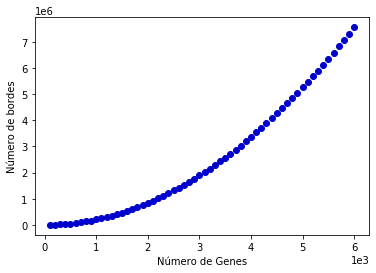

In [50]:
plt.plot(x_genes,y_alg_conn,'o', color = 'mediumblue')
plt.ticklabel_format(axis="x",style="sci",scilimits=(0,0))
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.xlabel("Número de Genes")
plt.ylabel("Número de bordes")

In [44]:
def curve(X,m,c):
    return(m*X**2-c*X**3+c*X**4)

In [45]:
#p_par muestra qué valores de m y c que hacen que esta función polinómica se ajuste mejor a los puntos
#p_cov es una matriz de covarianza que nos dice qué tan bien se ajusta esta función a nuestros
# datos

#parámetros adicionales: p0=[10,5],maxfev= 10000

p_par1,p_cov1 = curve_fit(curve,x_genes,y_alg_conn)

In [47]:
print(p_par1)

[ 2.10908988e-01 -2.90900118e-11]


In [48]:
print(p_cov1)

[[ 1.21553516e-08 -4.27196333e-16]
 [-4.27196333e-16  1.63469799e-23]]


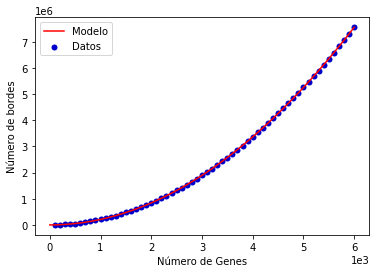

In [65]:
x_lin = np.linspace(0,6000,60)

fig, axes = plt.subplots()
axes.scatter(x_genes, y_alg_conn,linewidths=0.0001,c="mediumblue",label='Datos')
axes.plot(x_lin,curve(x_lin,2.109089*10**(-1),-2.909001*10**(-11)),c= "red",linewidth=1.5,label='Modelo')
plt.ticklabel_format(axis="x",style="sci",scilimits=(0,0))
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.xlabel("Número de Genes")
plt.ylabel("Número de bordes")
plt.legend()
plt.show()

In [52]:
print('R^2:', r2_score(y_alg_conn,curve(x_lin,2.109089*10**(-1),-2.909001*10**(-11))))

R^2: 0.9995914161710229


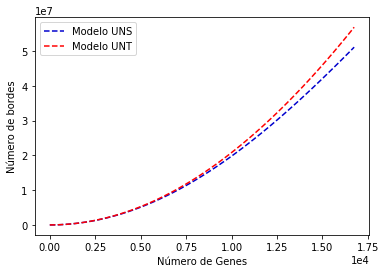

In [62]:
x_lin = np.linspace(0,16748,60)

fig, axes = plt.subplots()

axes.plot(x_lin,curve(x_lin,2.064390*10**(-1),-8.608490*10**(-11)),'--',c= "mediumblue",linewidth=1.5,label='Modelo UNS')

axes.plot(x_lin,curve(x_lin,2.109089*10**(-1),-2.909001*10**(-11)),'--',c= "red",linewidth=1.5,label='Modelo UNT')


plt.ticklabel_format(axis="x",style="sci",scilimits=(0,0))
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.xlabel("Número de Genes")
plt.ylabel("Número de bordes")
plt.legend()
plt.show()

In [70]:
# Predicción para el número de bordes con un total de 16748 genes. Para datos UNT.

curv1 = curve(16748,2.109089*10**(-1),-2.909001*10**(-11))

In [71]:
# Predicción para el número de bordes con un total de 16748 genes. Para datos UNS.

curv2 = curve(16748,2.064390*10**(-1),-8.608490*10**(-11))

In [72]:
curv1-curv2

5737747.545600414